In [2]:
#Загружаем библиотеки
import seaborn as sns
import tensorflow as tf
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv


In [56]:
df = pd.read_csv('right_data.csv')

df.loc[(df['ssx10mag10cp930']-df['ssx10mag10cp930'].shift()>1)| \
       (df['need_control'].shift()==1),'need_control'] = 1
df.loc[(df['ssx10mag10cp930'] > df['ssx10mag10cp930'].shift())& \
       (np.absolute(df['ssx10maa01cp001'] - df['ssx10maa01cp001'].shift())<0.1) & \
        (np.absolute(df['ssx10maa01ct001'] - df['ssx10maa01ct001'].shift())<5) & \
        (np.absolute(df['ssx10lbg40cp920'] - df['ssx10lbg40cp920'].shift())<2) & \
        (np.absolute(df['ssx10lca10ct001'] - df['ssx10lca10ct001'].shift())<1) & \
        (np.absolute(df['ssx10lbg11cp920'] - df['ssx10lbg11cp920'].shift())<0.05) & \
        (np.absolute(df['ssx10lca20cf001'] - df['ssx10lca20cf001'].shift())<30) & \
        (np.absolute(df['ssx10pab10cf001'] - df['ssx10pab10cf001'].shift())<300) & \
        (np.absolute(df['ssx10pab30cf001'] - df['ssx10pab30cf001'].shift())<300) & \
        (np.absolute(df['ssx10pab10ct001'] - df['ssx10pab10ct001'].shift())<2) & \
        (np.absolute(df['ssx10pab30ct001'] - df['ssx10pab30ct001'].shift())<2) & \
        (np.absolute(df['ssx10pab20ct001'] - df['ssx10pab20ct001'].shift())<2) & \
        (np.absolute(df['ssx10pab60ct001'] - df['ssx10pab60ct001'].shift())<2), 'incr_suction'] = 1

df.loc[(df['need_control']) & (df['ssx10maa01cp001']<=5.9), 'check_BROY'] = 1


df.loc[(df['need_control']) & (df['ssx10maa01ct001']>=527) & \
(df['ssx10maa01ct001']>df['ssx10maa01ct001'].shift()) & \
(df['ssx10maa01ct001'].shift()> df['ssx10maa01ct001'].shift(periods=2)),
'check_GTU_KU']  = 1

df.loc[(df['need_control']) & (df['ssx10lbg40cp920'] <= 100),
       'seal_sys_low_press'] = 1

df.loc[(df['need_control']) & \
        (df['ssx10mag10cp930'].shift() - df['ssx10mag10cp930'] > 1) & \
       (df['ssx10lca10ct001'] >=50),'low_steam' ] = 1

df.loc[(df['need_control']) & (df['ssx10lbg11cp920'] <= 0.3), 'check_ejectors'] = 1

df.loc[(df['need_control']) & (df['ssx10lca20cf001'] <=100), 'low_OK_flow_rate'] = 1

df.loc[(df['need_control']) & (df['ssx10pab10cf001'].shift() - df['ssx10pab10cf001'] > 500) & \
       (df['ssx10pab30cf001'].shift() - df['10pab30cf001'] > 500) , 'check_circ_sys'] = 1


df.loc[(df['need_control']) & \
       (df['ssx10pab10ct001'].shift() - df['ssx10pab10ct001'] >=2) & \
       (df['ssx10pab30ct001'].shift() - df['ssx10pab30ct001'] >=2) & \
       (df['ssx10pab10cf001'].shift() - df['ssx10pab10cf001'] <=300) & \
       (df['ssx10pab30cf001'].shift() - df['ssx10pab30cf001'] <=300),'hight_cv_temp'] = 1

df.loc[(df['need_control']) & \
       (df['ssx10pab20ct001'].shift() - df['ssx10pab20ct001'] >=2) & \
       (df['ssx10pab60ct001'].shift() - df['ssx10pab60ct001'] >=2) & \
       (df['ssx10pab10cf001'].shift() - df['ssx10pab10cf001'] <=300) & \
       (df['ssx10pab30cf001'].shift() - df['ssx10pab30cf001'] <=300), 'need_run_sso' ] = 1





KeyError: 'need_control'

In [44]:
dfnormal = pd.read_csv('normal_data.csv')

dfwarning = pd.read_csv('warning1.csv')


In [46]:
len(dfwarning)

696

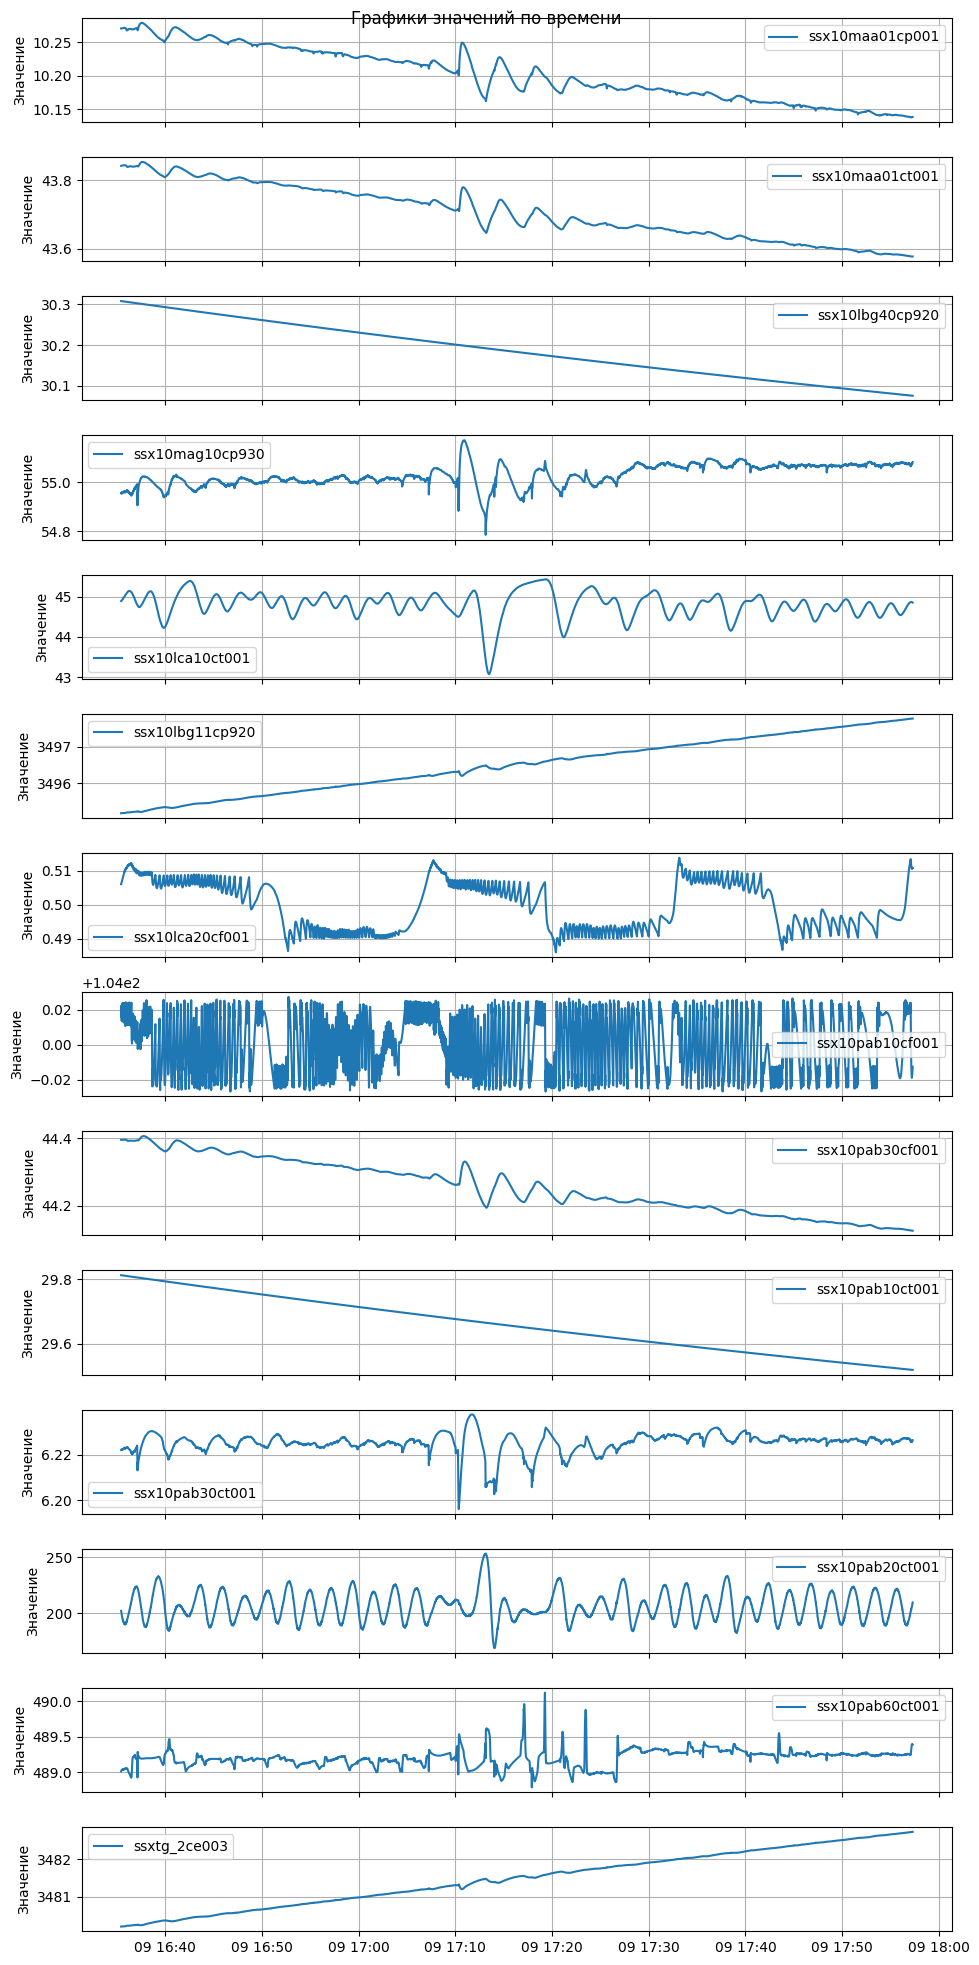

['ssx10maa01cp001',
 'ssx10maa01ct001',
 'ssx10lbg40cp920',
 'ssx10mag10cp930',
 'ssx10lca10ct001',
 'ssx10lbg11cp920',
 'ssx10lca20cf001',
 'ssx10pab10cf001',
 'ssx10pab30cf001',
 'ssx10pab10ct001',
 'ssx10pab30ct001',
 'ssx10pab20ct001',
 'ssx10pab60ct001',
 'ssxtg_2ce003',
 'DateTime']

In [43]:
csv_file1 = 'normal_data.csv'

with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    first_row = next(reader)

first_row
type(first_row)

# Считываем данные из CSV-файла
data = []
with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Пропускаем первую строку (заголовки)
    for row in reader:
        data.append(row)

# Извлекаем значения по времени и соответствующие значения для каждого столбца
time = [datetime.datetime.strptime(row[14], '%Y-%m-%d %H:%M:%S.%f') for row in data]  

values = [
    [float(row[i]) for row in data] 
    for i in range(0, 14)
]


# Создаем фигуру и сетку subplots (1 столбец, 14 строк)
fig, axes = plt.subplots(nrows=14, ncols=1, sharex=True, figsize=(10, 20))  # Adjust figsize as needed

# Устанавливаем заголовки для всей фигуры
fig.suptitle('Графики значений по времени')

# Итерируем по значениям и строим графики на соответствующих subplot'ах
for i, (column_values, param_name) in enumerate(zip(values, first_row)):
    axes[i].plot(time, column_values, label=param_name)
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].grid(True)


plt.subplots_adjust(hspace=2)
# Отображаем графики
plt.tight_layout()
plt.show()

first_row


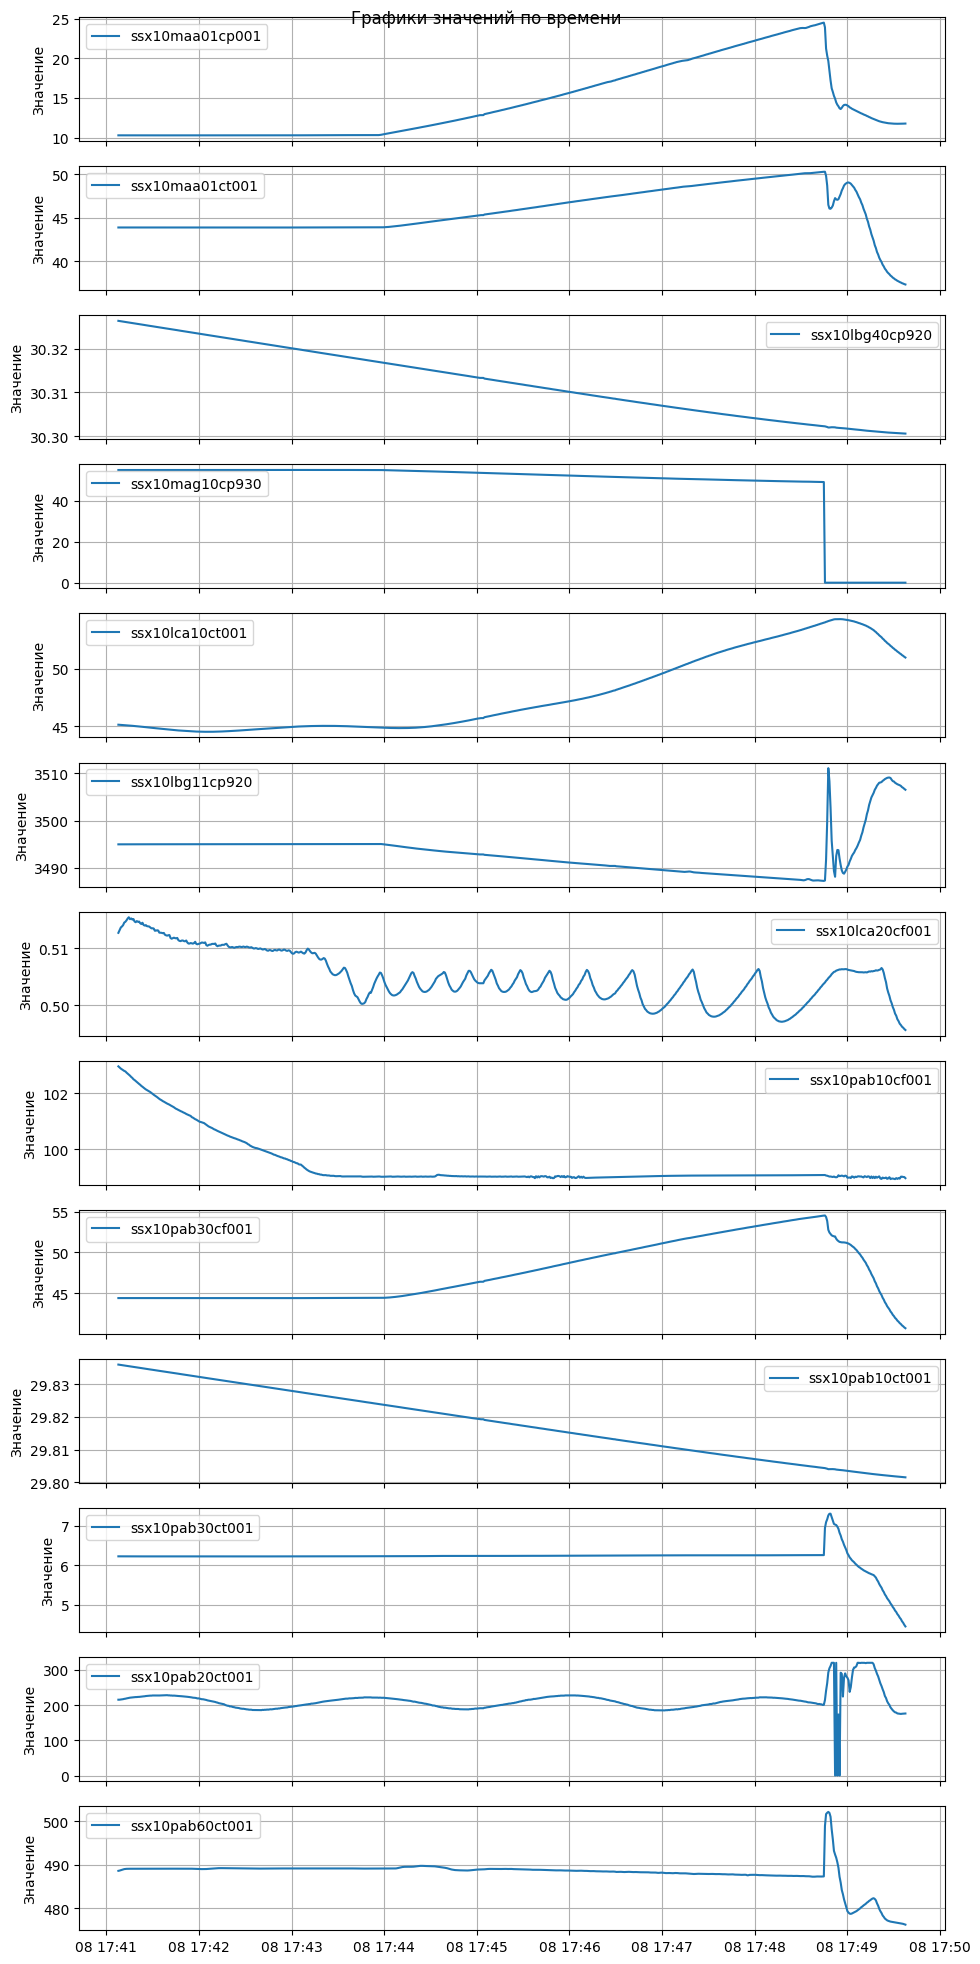

['ssx10maa01cp001',
 'ssx10maa01ct001',
 'ssx10lbg40cp920',
 'ssx10mag10cp930',
 'ssx10lca10ct001',
 'ssx10lbg11cp920',
 'ssx10lca20cf001',
 'ssx10pab10cf001',
 'ssx10pab30cf001',
 'ssx10pab10ct001',
 'ssx10pab30ct001',
 'ssx10pab20ct001',
 'ssx10pab60ct001',
 'ssxtg_2ce003',
 'DateTime']

In [40]:
csv_file1 = 'warning1.csv'

with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    first_row = next(reader)

first_row
type(first_row)

# Считываем данные из CSV-файла
data = []
with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Пропускаем первую строку (заголовки)
    for row in reader:
        data.append(row)

# Извлекаем значения по времени и соответствующие значения для каждого столбца
time = [datetime.datetime.strptime(row[14], '%Y-%m-%d %H:%M:%S.%f') for row in data]  

values = [
    [float(row[i]) for row in data] 
    for i in range(0, 13)
]


# Создаем фигуру и сетку subplots (1 столбец, 14 строк)
fig, axes = plt.subplots(nrows=13, ncols=1, sharex=True, figsize=(10, 20))  # Adjust figsize as needed

# Устанавливаем заголовки для всей фигуры
fig.suptitle('Графики значений по времени')

# Итерируем по значениям и строим графики на соответствующих subplot'ах
for i, (column_values, param_name) in enumerate(zip(values, first_row)):
    axes[i].plot(time, column_values, label=param_name)
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].grid(True)


plt.subplots_adjust(hspace=2)
# Отображаем графики
plt.tight_layout()
plt.show()

first_row


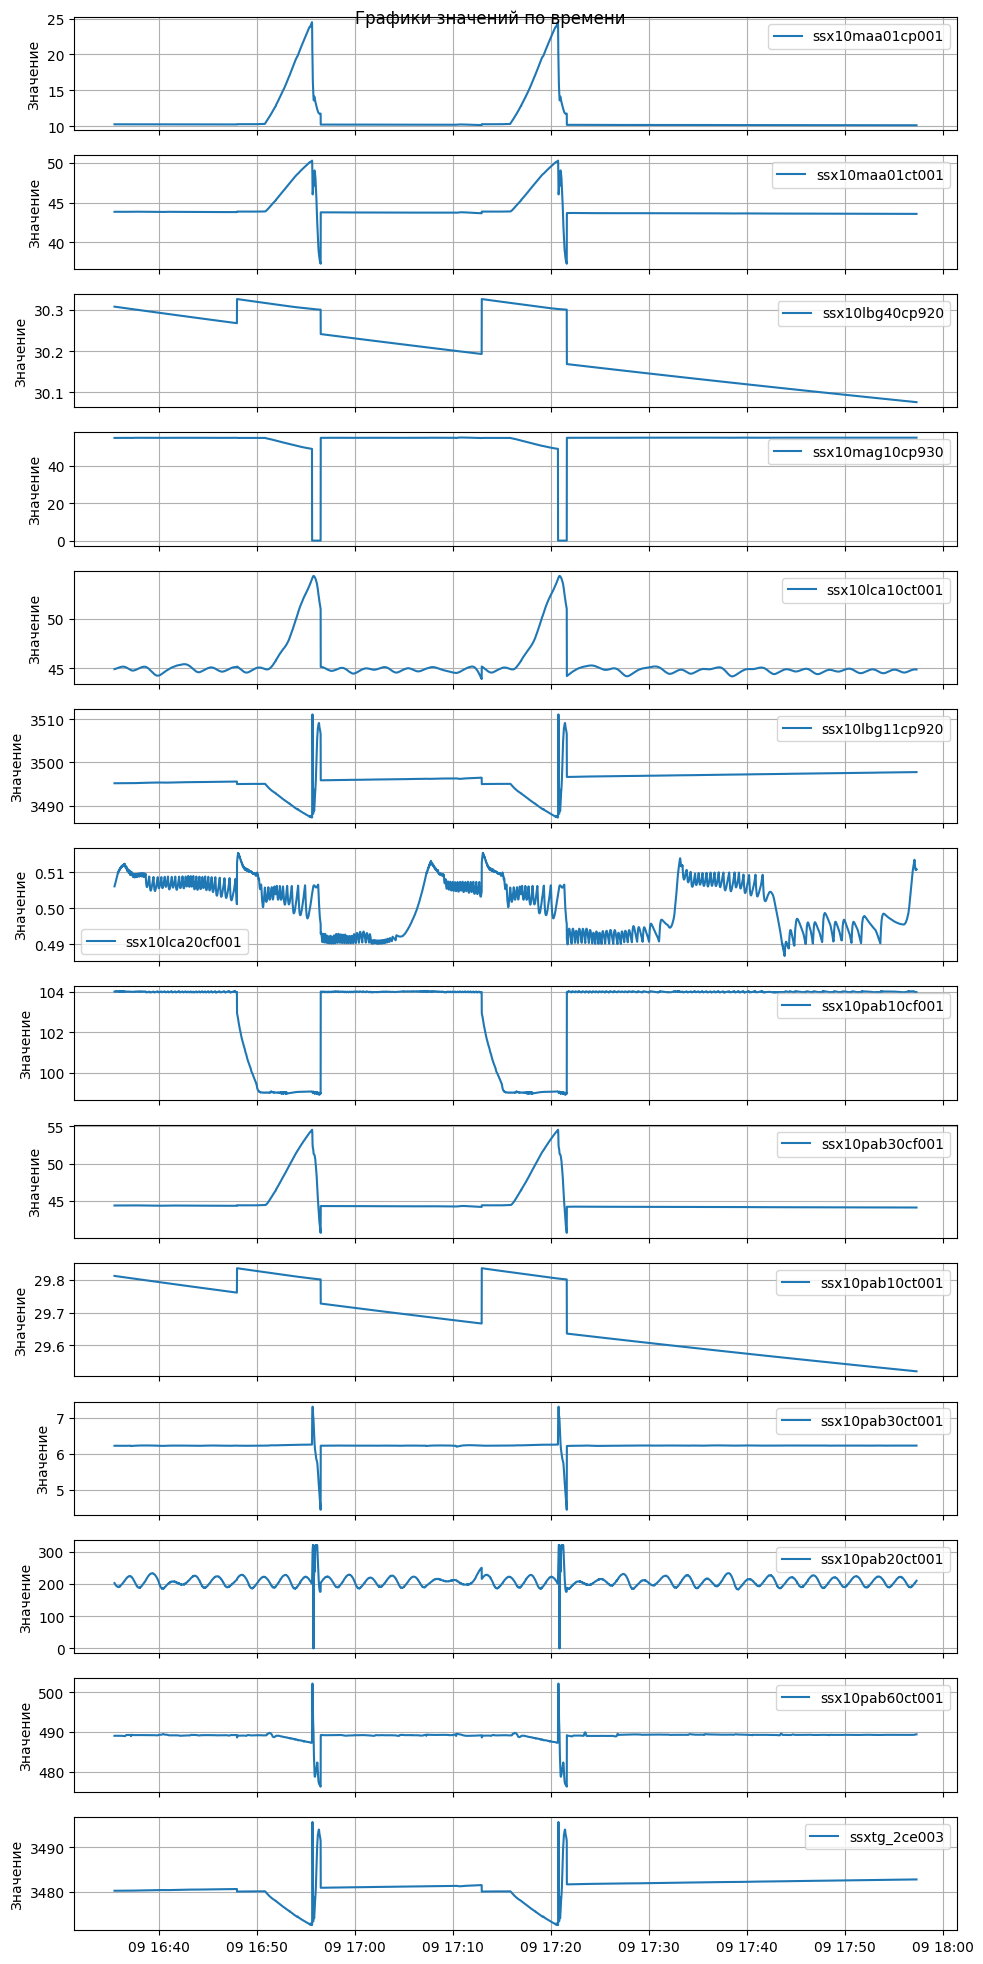

['ssx10maa01cp001',
 'ssx10maa01ct001',
 'ssx10lbg40cp920',
 'ssx10mag10cp930',
 'ssx10lca10ct001',
 'ssx10lbg11cp920',
 'ssx10lca20cf001',
 'ssx10pab10cf001',
 'ssx10pab30cf001',
 'ssx10pab10ct001',
 'ssx10pab30ct001',
 'ssx10pab20ct001',
 'ssx10pab60ct001',
 'ssxtg_2ce003',
 'DateTime']

In [55]:
csv_file1 = 'mix_data.csv'

with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    first_row = next(reader)

first_row
type(first_row)

# Считываем данные из CSV-файла
data = []
with open(csv_file1, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Пропускаем первую строку (заголовки)
    for row in reader:
        data.append(row)

# Извлекаем значения по времени и соответствующие значения для каждого столбца
time = [datetime.datetime.strptime(row[14], '%Y-%m-%d %H:%M:%S.%f') for row in data]  

values = [
    [float(row[i]) for row in data] 
    for i in range(0, 14)
]


# Создаем фигуру и сетку subplots (1 столбец, 14 строк)
fig, axes = plt.subplots(nrows=14, ncols=1, sharex=True, figsize=(10, 20))  # Adjust figsize as needed

# Устанавливаем заголовки для всей фигуры
fig.suptitle('Графики значений по времени')

# Итерируем по значениям и строим графики на соответствующих subplot'ах
for i, (column_values, param_name) in enumerate(zip(values, first_row)):
    axes[i].plot(time, column_values, label=param_name)
    axes[i].set_ylabel('Значение')
    axes[i].legend()
    axes[i].grid(True)


plt.subplots_adjust(hspace=2)
# Отображаем графики
plt.tight_layout()
plt.show()

first_row

In [51]:
# Выносим столбец DateTime в отдельный датафрейм
df_datetime = dfnormal[['DateTime']]

# Создаем новый датафрейм для записи
df_new = dfnormal.copy()

# Вставляем значения из dfwarning в df_new для столбцов 0-14
df_new.iloc[1000:1000 + len(dfwarning), 0:14] = dfwarning.iloc[:, 0:14]
df_new.iloc[3000:3000 + len(dfwarning), 0:14] = dfwarning.iloc[:, 0:14]



,ssx10maa01cp001,ssx10maa01ct001,ssx10lbg40cp920,ssx10mag10cp930,ssx10lca10ct001,ssx10lbg11cp920,ssx10lca20cf001,ssx10pab10cf001,ssx10pab30cf001,ssx10pab10ct001,ssx10pab30ct001,ssx10pab20ct001,ssx10pab60ct001,ssxtg_2ce003,DateTime
0,10.270994,43.841614,30.307894,54.954401,44.890861,3495.188005,0.506049,104.016115,44.395362,29.812344,6.222020,202.072078,489.015021,3480.194382,2024-07-09 16:35:27.154034
1,10.270967,43.841737,30.307861,54.954136,44.893248,3495.188363,0.506161,104.020445,44.395335,29.812302,6.222045,201.087811,489.021920,3480.194742,2024-07-09 16:35:27.892078
2,10.270935,43.841874,30.307811,54.955067,44.896981,3495.188955,0.506312,104.022178,44.395294,29.812239,6.222217,200.931855,489.029908,3480.195333,2024-07-09 16:35:28.626439
3,10.270975,43.841938,30.307778,54.956281,44.899568,3495.189461,0.506403,104.022544,44.395265,29.812197,6.222287,200.582161,489.031031,3480.195833,2024-07-09 16:35:29.358950
4,10.271030,43.842055,30.307732,54.957288,44.903360,3495.189674,0.506525,104.022352,44.395246,29.812137,6.222305,199.449976,489.031465,3480.196050,2024-07-09 16:35:30.086347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,10.137935,43.577615,30.076032,55.075892,44.861172,3497.762183,0.510658,103.982670,44.125666,29.519721,6.225603,206.986081,489.389468,3482.742624,2024-07-09 17:57:14.570112
6488,10.137805,43.577623,30.076006,55.076522,44.859610,3497.762617,0.510720,103.983479,44.125652,29.519688,6.225755,207.440162,489.394691,3482.743052,2024-07-09 17:57:15.330013
6489,10.137862,43.577601,30.075970,55.079792,44.857194,3497.763277,0.510826,103.984911,44.125620,29.519643,6.226050,208.180156,489.396666,3482.743703,2024-07-09 17:57:16.159440
6490,10.138089,43.577628,30.075935,55.082784,44.854639,3497.763469,0.510945,103.986291,44.125612,29.519600,6.226208,208.942433,489.393290,3482.743899,2024-07-09 17:57:16.917354


In [54]:
df_new.to_csv('mix_data.csv', index=False)